## Importing libararies

In [1]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

## Adult Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
columns_names = ['age','workclass','fnlwg','education','education_num','martial_status',
                 'ocupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                 'country','target']
data = pd.read_csv("adult_data.csv",header=None,names=columns_names)
data.head()

,age,workclass,fnlwg,education,education_num,martial_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe()

,age,fnlwg,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwg           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   ocupation       32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwg             0
education         0
education_num     0
martial_status    0
ocupation         0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
target            0
dtype: int64

In [7]:
data.shape

(32561, 15)

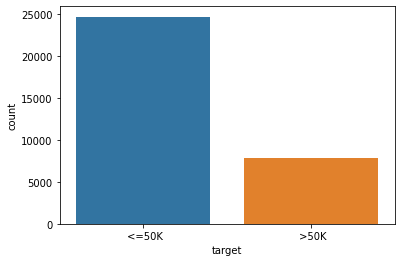

In [8]:
sns.countplot(x='target',data=data)

## Entrophy implementation

In [9]:
def entrophy(class_y):
  if len(class_y)<=1:
    return 0
  total_count = np.bincount(class_y)
  probabilities = total_count[np.nonzero(total_count)]/len(class_y)
  if len(probabilities)<=1:
    return 0
  return -np.sum(probabilities*np.log(probabilities))/np.log(len(probabilities))

In [10]:
## information gain

def information_gain(Y,X):
  conditional_entrophy =0
  for y in X:
    conditional_entrophy += (entrophy(y) * len(y)/len(Y))
  info_gain = entrophy(Y) - conditional_entrophy
  return info_gain


In [11]:
##testing 
test_class_y = [0,0,0,1,1,1,1]
print(entrophy(test_class_y))

previous_y = [0,0,0,1,1,1]
current_y = [[0,0],[1,1,1,0]]
print(information_gain(previous_y,current_y))

0.9852281360342515
0.4591479170272448


In [12]:
def partition_classes(X,y,split_attribute,split_val):
  X = np.array(X)
  column_split = X[:,split_attribute]
  X_left = []
  y_right = []
  X_right=[]
  y_left=[]
  counter =0
  if isinstance(split_val,str)==False: ## NUmerical attribute
    for i in column_split:
      if i<=split_val:
        X_left.append(X[counter])
        y_left.append(y[counter])
      else:
        X_right.append(X[counter])
        y_right.append(y[counter])
      counter+=1
  else: #Categorical attribute
    for i in column_split:
      if i == split_val:
        X_left.append(X[counter])
        y_left.append(y[counter])
      else:
        X_right.append(X[counter])
        y_right.append(y[counter])
      counter+=1
  return X_left,X_right,y_left,y_right




In [13]:
## finding best split
def find_best_split(X,y,split_attribute):
  best_info_gain =0
  X = np.array(X)
  column_split = X[:,split_attribute]
  column_split= np.unique(column_split)
  best_split_value = column_split[0]
  for split_val in column_split:
    current_X_left, current_X_right,current_y_left,current_y_right = partition_classes(X,y,split_attribute,split_val)
    current_y=[]
    current_y.append(current_y_left)
    current_y.append(current_y_right)

    current_info_gain = information_gain(y,current_y)
    if current_info_gain>best_info_gain:
      best_info_gain= current_info_gain
      best_split_value = split_val
  return best_split_value,best_info_gain

In [14]:
## find best feature
def find_best_feature(X,y):
  best_info_gain =0
  best_feature = 0
  best_split_val=0
  for feature_index in range(len(X[0])):
    current_best_split_val,current_best_info_gain = find_best_split(X,y,feature_index)
    if current_best_info_gain>best_info_gain:
      best_info_gain= current_best_info_gain
      best_feature = feature_index
      best_split_val = current_best_split_val
  return best_feature,best_split_val

In [15]:
from numpy.lib.arraysetops import unique
## class
class DecisionTree(object):
  def __init__(self,max_depth=None):
    self.tree={}
    self.residual_tree={}
    self.max_depth = max_depth
  def fit(self,X,y,depth):
    unique_labels = np.unique(y) 
    if (len(unique_labels)==1) or (depth == max_depth): ## IF we reach the maximum depth or the unique labels = 1
        unique_labels, counts_unique_labels = np.unique(y, return_counts=True)
        index = counts_unique_labels.argmax()
        classification = unique_labels[index]    
        return classification
    best_feat, best_split  = find_best_feature(X, y) ## Find best feature (Step 1)
    best_split, information_gain = find_best_split(X, y, best_feat) ## Split on this feature (Step 2)
    X_left, X_right, y_left, y_right = partition_classes(X, y, best_feat, best_split) ## Partition on the best feature and split (Step 3)
    
    if isinstance(best_split,str):
        question = "{} == {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
    else:
        question = "{} <= {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
    node = {question: []}
    
    # find answers (recursion)
    depth+=1 
    yes_answer = self.fit(X_left,y_left, depth)  # RECURSION on the left sub tree
    no_answer = self.fit(X_right, y_right, depth) ## RECURSION on the right sub tree
    
    if yes_answer == no_answer: ## Both trees are the same
        node = yes_answer
    else:
        node[question].append(yes_answer) ## Append the questions to the answers
        node[question].append(no_answer)
    self.tree = node ## The tree is equal to the node
    return node

  def predict(self, record,flag=1):
        if flag == 1: ## First time
            self.residual_tree = self.tree
        question = list(self.residual_tree.keys())[0]
        feature, comparison, value = question.split() ## Split the question to get the feature and its value

        
        ## Check if str or int
        if comparison == "==": # String
            if record[int(feature)] == value:
                answer = self.residual_tree[question][0]  ## Left sub tree
            else:
                answer = self.residual_tree[question][1] ## Right sub-tree
        elif comparison == "<=": #Integer
            if record[int(feature)] <= float(value):
                answer = self.residual_tree[question][0] ## Right Sub-tree
            else:
                answer = self.residual_tree[question][1] ## Left sub-tree        try: ## Integer
                
        # base case
        if not isinstance(answer, dict):  ## If we have the answer
            return answer
    
        # recursion
        else:
            self.residual_tree = answer ## The residual tree is the answer !
            return self.predict(record,0) ## have flag = 0 so the residual tree is our sub-problem



In [16]:
def DecisionTreeEvaluation(id3,X,y,verbose=False):
  y_predicted = []
  for record in X:
    y_predicted.append(id3.predict(record))
  results = [prediction==truth for prediction,truth in zip(y_predicted,y)]
  accuracy = float(results.count(True))/float(len(results))
  if verbose:
    print("accuracy: %.4f" % accuracy)
  return accuracy

In [17]:
columns_names = ['age','workclass','fnlwg','education','education_num','martial_status',
                 'ocupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                 'country','target']
df_train = pd.read_csv("adult_data.csv",header=None,names=columns_names)
df_train.drop(columns='fnlwg',inplace=True)
df_train.head()

,age,workclass,education,education_num,martial_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
columns_names = ['age','workclass','fnlwg','education','education_num','martial_status',
                 'ocupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                 'country','target']
df_test = pd.read_csv("adult_test.csv",header=None,names=columns_names)
df_test.drop(columns='fnlwg',inplace=True)
df_test.head()

,age,workclass,education,education_num,martial_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [19]:
df_test = df_test.iloc[1:]
df_test.head()

,age,workclass,education,education_num,martial_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
1,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [41]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
print(y_train.head())
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
print(y_train)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target, dtype: object
[0 0 0 ... 0 0 1]


In [42]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
print(y_test.head())
label_enc = LabelEncoder()
y_test = label_enc.fit_transform(y_test)
print(y_test)

1     <=50K.
2     <=50K.
3      >50K.
4      >50K.
5     <=50K.
Name: target, dtype: object
[0 0 1 ... 0 0 1]


In [22]:
X_train,X_test = X_train.to_numpy(),X_test.to_numpy()
max_depth=3
initial_depth = 0
id3_dt = DecisionTree(max_depth)
print("fitting the decision tree")
id3_dt.fit(X_train,y_train,initial_depth)
# Evaluation
DecisionTreeEvaluation(id3_dt,X_test,y_test,True)

fitting the decision tree


TypeError: ignored

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   martial_status  32561 non-null  object
 5   ocupation       32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  country         32561 non-null  object
 13  target          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   education       16281 non-null  object 
 3   education_num   16281 non-null  float64
 4   martial_status  16281 non-null  object 
 5   ocupation       16281 non-null  object 
 6   relationship    16281 non-null  object 
 7   race            16281 non-null  object 
 8   sex             16281 non-null  object 
 9   capital_gain    16281 non-null  float64
 10  capital_loss    16281 non-null  float64
 11  hours_per_week  16281 non-null  float64
 12  country         16281 non-null  object 
 13  target          16281 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.7+ MB


In [32]:
df_test['age'] = pd.to_numeric(df_test['age'])

In [35]:
X_train,X_test = X_train.to_numpy(),X_test.to_numpy()
max_depth=3
initial_depth = 0
id3_dt = DecisionTree(max_depth)
print("fitting the decision tree")
id3_dt.fit(X_train,y_train,initial_depth)
# Evaluation
DecisionTreeEvaluation(id3_dt,X_test,y_test,True)

fitting the decision tree
accuracy: 0.8031


0.8030833486886555

In [36]:
id3_dt.tree

{'4 ==  Married-civ-spouse': [{'3 <= 12': [{'9 <= 5013': [0, 1]}, 1]},
  {'9 <= 6849': [0, {'0 <= 20': [0, 1]}]}]}

In [40]:
X_train

array([[39, ' State-gov', ' Bachelors', ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', ' Bachelors', ..., 0, 13,
        ' United-States'],
       [38, ' Private', ' HS-grad', ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', ' HS-grad', ..., 0, 40, ' United-States'],
       [22, ' Private', ' HS-grad', ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', ' HS-grad', ..., 0, 40, ' United-States']],
      dtype=object)

In [43]:
X_train_encoded = pd.get_dummies(X_train,drop_first=True)
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

In [44]:
X_train_encoded.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
set(X_train_encoded.columns)-set(X_test_encoded.columns)

{'country_ Holand-Netherlands'}

In [51]:
X_train_encoded.drop(columns='country_ Holand-Netherlands',inplace=True)

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
clf.fit(X_train_encoded,y_train)
y_pred = clf.predict(X_test_encoded)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8447884036607088


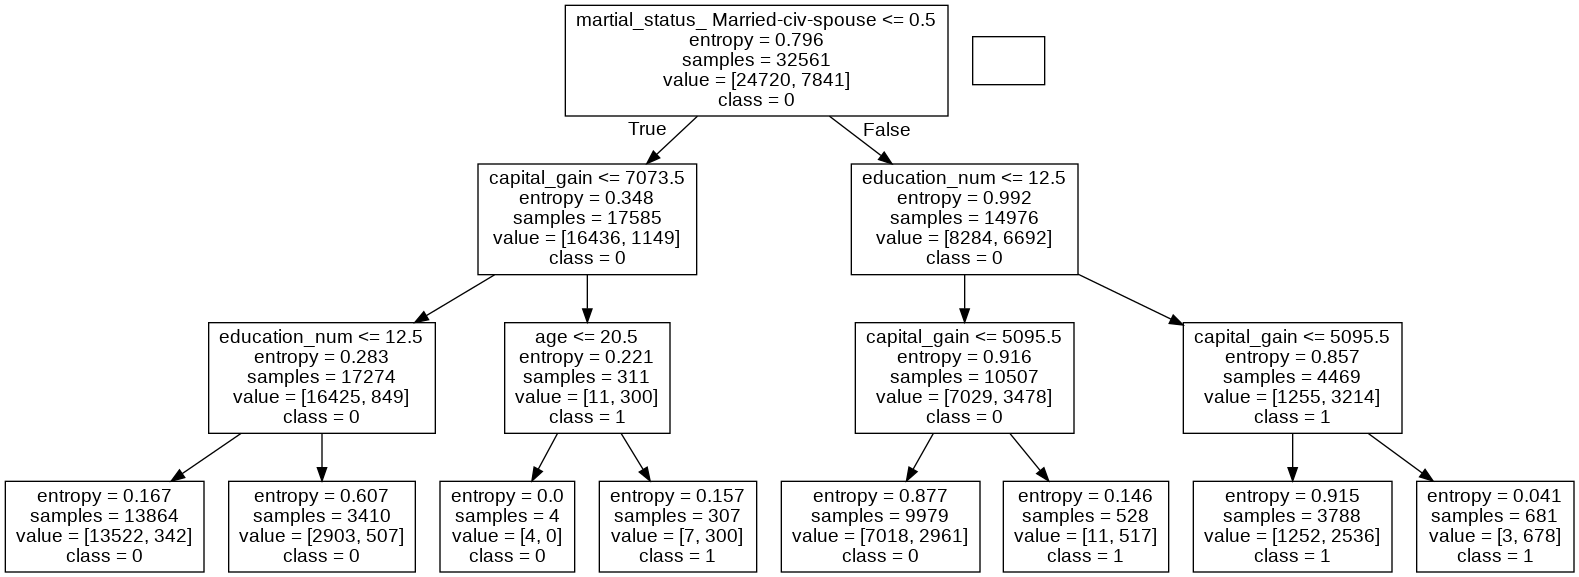

In [54]:
## visualizing the tree

feature_names= list(X_train_encoded.columns)

dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,feature_names=feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit_tree.png')
Image(graph.create_png())

In [56]:
feature_names = list(X_train_encoded.columns)
num_features = len(feature_names)
importance = clf.feature_importances_

df_importance = pd.DataFrame({"names":feature_names,"importance":importance})
df_importance= df_importance.sort_values('importance',ascending=False).reset_index()
df_importance.head()

,index,names,importance
0,29,martial_status_ Married-civ-spouse,0.539871
1,2,capital_gain,0.250352
2,1,education_num,0.207548
3,0,age,0.002230
4,95,country_ United-States,0.000000


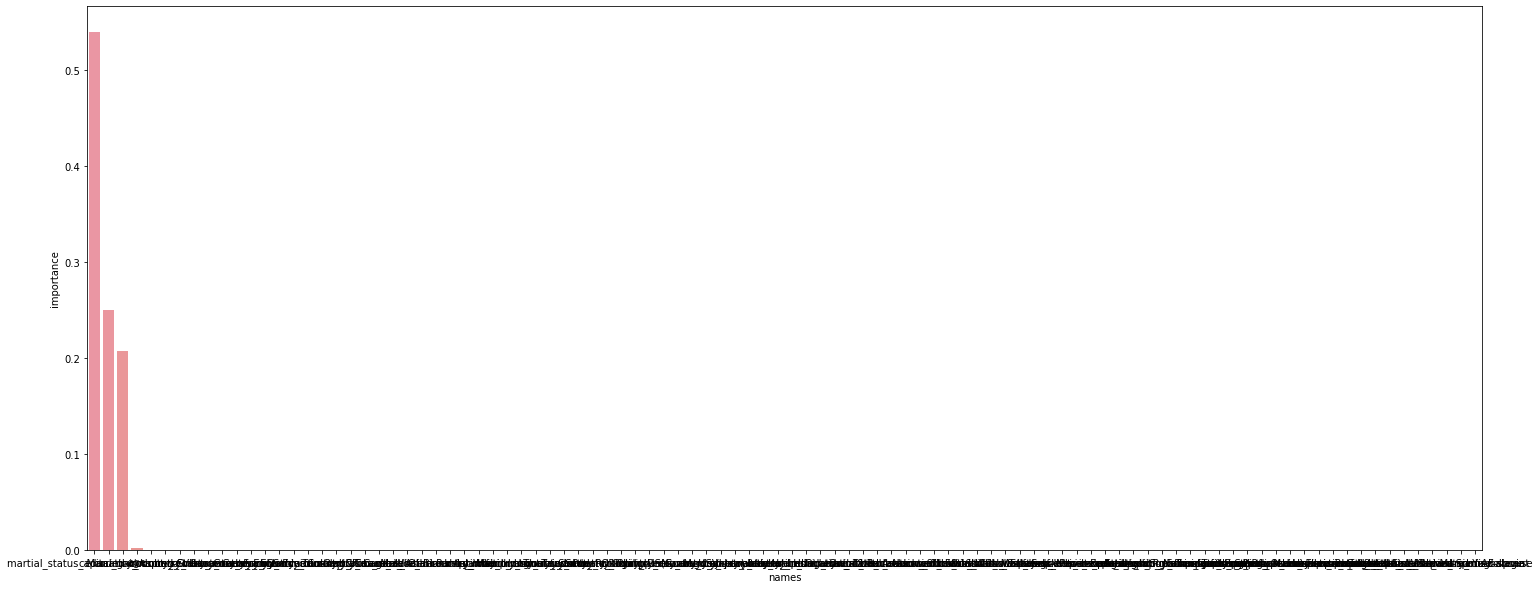

In [59]:
plt.figure(figsize=(25,10))
sns.barplot(data=df_importance,x="names",y="importance")

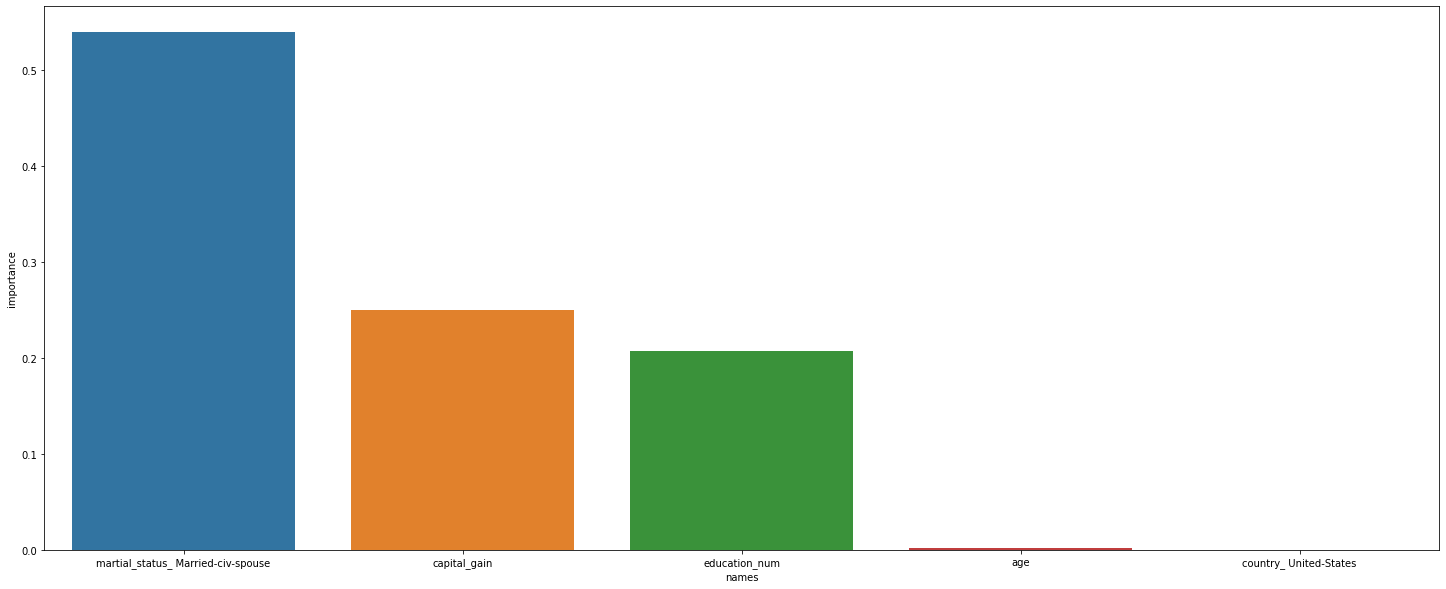

In [60]:
plt.figure(figsize=(25,10))
sns.barplot(data=df_importance[:5],x="names",y="importance")

In [62]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
print("Start fitting the data")

hp = {"criterion":['gini','entropy'],'max_depth':np.arange(3,9)}
for cv in tqdm(range(3,6)):
  grid = GridSearchCV(clf,param_grid=hp,cv=cv)
  grid.fit(X_train_encoded,y_train)
  print(f"score for {cv} fold CV is :{grid.score(X_test_encoded,y_test)}")
  print(f"Best result {grid.best_params_}")

Start fitting the data


  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV is :0.856028499477919
Best result {'criterion': 'entropy', 'max_depth': 7}
score for 4 fold CV is :0.8568883975185799
Best result {'criterion': 'gini', 'max_depth': 8}
score for 5 fold CV is :0.8570726613844358
Best result {'criterion': 'gini', 'max_depth': 8}


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

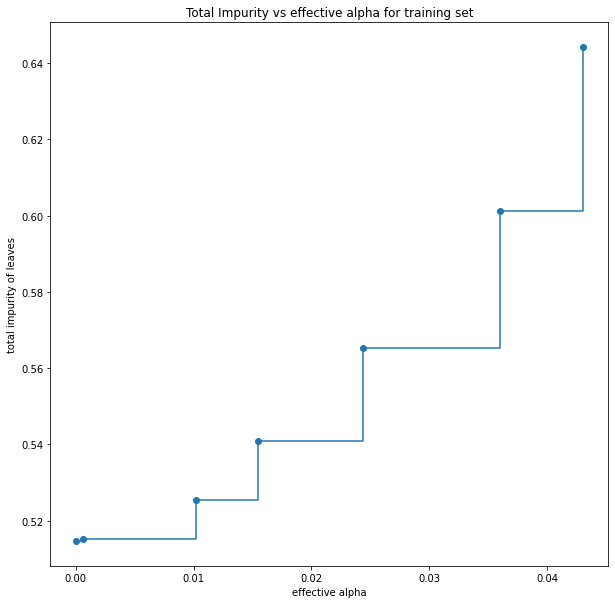

In [65]:
# X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

# X_train = pd.get_dummies(X_train,drop_first=True)
# X_test = pd.get_dummies(X_test,drop_first=True)
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
path = clf.cost_complexity_pruning_path(X_train_encoded, y_train) ## Pruning !

ccp_alphas, impurities = path.ccp_alphas, path.impurities ## Alpha we have been talking about
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [67]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_encoded, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15210656150745572


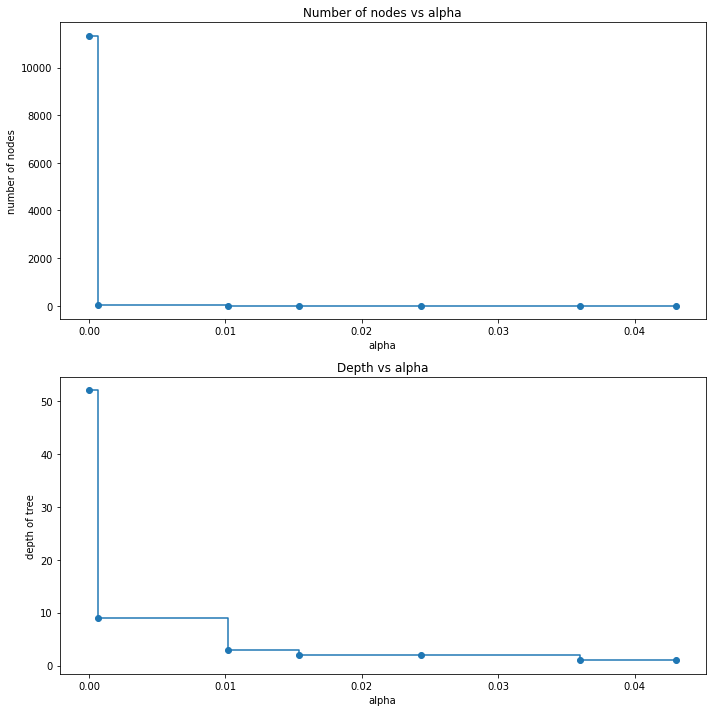

In [68]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

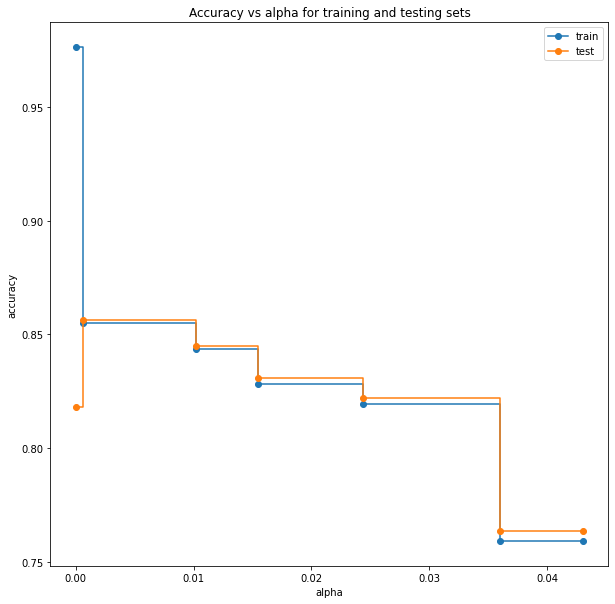

In [69]:
train_scores = [clf.score(X_train_encoded, y_train) for clf in clfs]
test_scores = [clf.score(X_test_encoded, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()